In [85]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import validation_curve
from sklearn.metrics import f1_score
from sklearn.metrics import (ConfusionMatrixDisplay, accuracy_score,
                             confusion_matrix, log_loss)
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

We develop here how we have treated the data in order to fit the model ini the best way possible using KNN

In [86]:
df_train = pd.read_csv('data/train.csv')
df_train.dropna(subset=['Y'], inplace=True)

X = df_train.drop('Y', axis = 1)
y = df_train['Y']


X_test_prueb = pd.read_csv('data/Xtest.csv')
df_train.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,Y
0,3215.0,206.0,8.0,127.0,14.0,5588.0,215.0,248.0,168.0,1057.0,T1,T29,1.0
1,3022.0,18.0,7.0,0.0,0.0,3012.0,215.0,226.0,148.0,1476.0,T1,T23,1.0
2,3008.0,18.0,19.0,382.0,92.0,4715.0,201.0,197.0,127.0,3616.0,T1,T29,1.0
3,2595.0,296.0,24.0,85.0,28.0,1252.0,144.0,224.0,216.0,780.0,T3,T33,6.0
4,3261.0,87.0,4.0,42.0,-2.0,3719.0,226.0,233.0,142.0,3784.0,T1,T38,7.0


In [87]:
X = X.astype({'X11':'category', 'X12': 'category'})
X_test_prueb = X_test_prueb.astype({'X11':'category', 'X12':'category'})

We split our initial trainning set in order to have the chance of testing how the model predicts in new data, also to aviod having overfitting.

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
columna = ['X11']
imputer = SimpleImputer(strategy='most_frequent')

X_train[columna] = imputer.fit_transform(X_train[columna])
X_test[columna] = imputer.fit_transform(X_test[columna])

X_train_cat = pd.DataFrame(X_train[columna])
X_test_cat = pd.DataFrame(X_test[columna])

columnas = ['X1', 'X3','X4', 'X6', 'X10']

# Rellenar los valores faltantes con la media
imputer = SimpleImputer(strategy='mean')
X_train[columnas] = imputer.fit_transform(X_train[columnas])
X_test[columnas] = imputer.fit_transform(X_test[columnas])

# Convertir a un array de numpy
X_train_sub = pd.DataFrame(X_train[columnas])
X_test_sub = pd.DataFrame(X_test[columnas])

In [90]:
X_train_num  = X_train_sub[['X1', 'X3','X4','X6','X10']]
X_train_cat = X_train[['X11']]
X_test_num = X_test_sub[['X1', 'X3','X4', 'X6','X10']]
X_test_cat = X_test[['X11']]




ohe = OneHotEncoder(sparse=False)
X_train_categorical_encoded = ohe.fit_transform(X_train_cat)
X_test_cat_encoded = ohe.fit_transform(X_test_cat)


#The real test
X_test_prueb_num = X_test_prueb[['X1', 'X3','X4' ,'X6', 'X10']]
X_test_prueb_cat = X_test_prueb[['X11']]
X_prueb_cat_encoded = ohe.fit_transform(X_test_prueb_cat)

X_test_final = np.concatenate((X_test_prueb_num, X_prueb_cat_encoded), axis=1)



X_train_sub = np.concatenate((X_train_num, X_train_categorical_encoded), axis=1)
X_test_num = np.concatenate((X_test_num, X_test_cat_encoded), axis=1)

c:\Users\cmari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\cmari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\cmari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [52]:
pd.DataFrame(X_train_sub).head()

,0,1,2,3,4,5,6,7,8
0,3106.0,9.0,30.0,5191.0,2160.0,1.0,0.0,0.0,0.0
1,3181.0,2.0,182.0,4983.0,2435.0,1.0,0.0,0.0,0.0
2,3286.0,7.0,85.0,3282.0,1974.0,1.0,0.0,0.0,0.0
3,3100.0,8.0,242.0,6262.0,2567.0,1.0,0.0,0.0,0.0
4,2850.0,13.0,134.0,485.0,631.0,0.0,0.0,1.0,0.0


In [53]:
nb = LogisticRegression()

param_grid_lr = {
    'penalty': ['l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'fit_intercept': [True, False],
}

default_grid_params = dict(n_iter=10, cv=5, n_jobs=4)
model = RandomizedSearchCV(nb, param_grid_lr, scoring='neg_log_loss', **default_grid_params)


model.fit(X_train_sub, y_train)

y_pred = model.predict(X_test_num)


y_pred_proba = model.predict_proba(X_test_num)
pred_prob_test = pd.DataFrame(model.predict_proba(X_test_num))
pred_prob_test.rename(columns = {0: 'Y_1', 1: 'Y_2', 2: 'Y_3', 3: 'Y_4', 4: 'Y_5', 5:'Y_6', 6:'Y_7'}, inplace = True)
idx = pred_prob_test.index
pred_prob_test.insert(0, 'id', idx)

test_log_loss = log_loss(y_test, y_pred_proba, labels=model.classes_)
print('Log loss:', test_log_loss)
print(f'Best hyperparameters: {model.best_params_}')
 

KeyboardInterrupt: 

c:\Users\cmari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\cmari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test log-loss : 1.1157582281463325


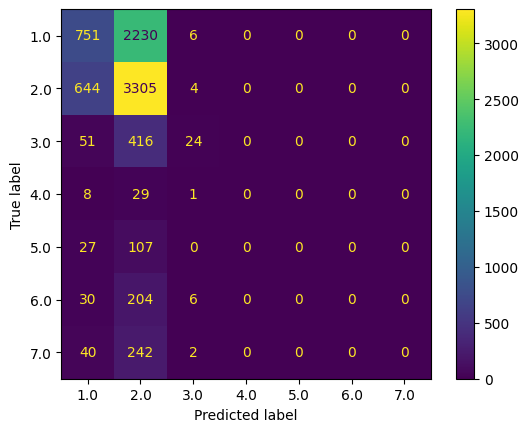

c:\Users\cmari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\cmari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test log-loss : 1.115631419179877


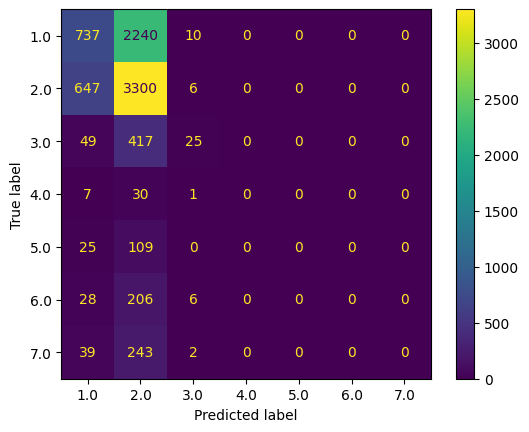

c:\Users\cmari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\cmari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test log-loss : 1.1158765131561101


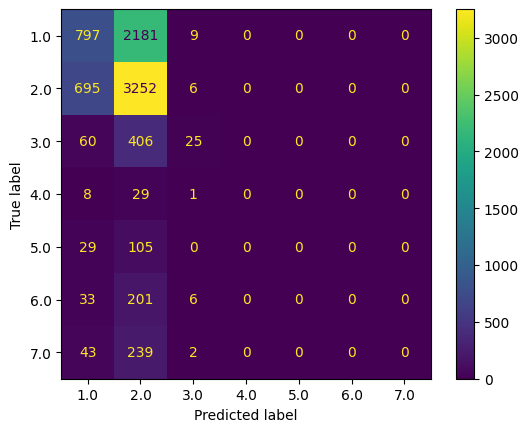

c:\Users\cmari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\cmari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test log-loss : 1.1158838496678882


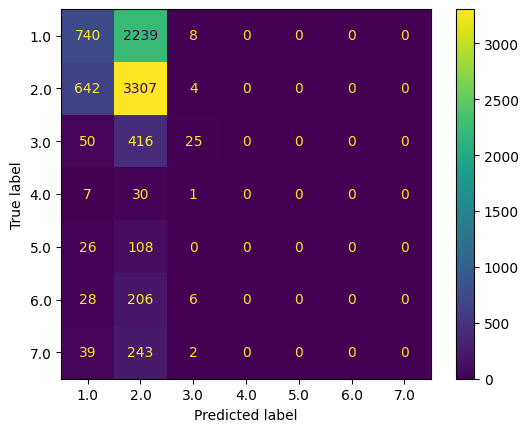

c:\Users\cmari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\cmari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test log-loss : 1.1157939435606952


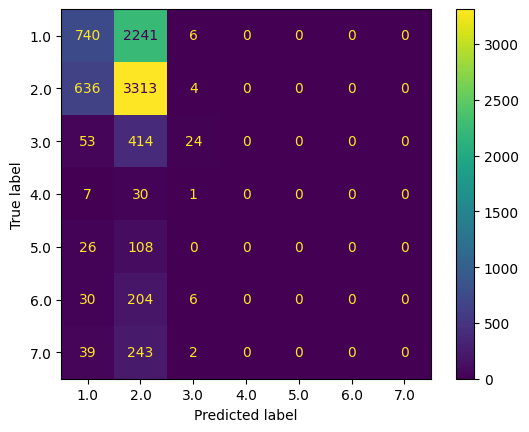

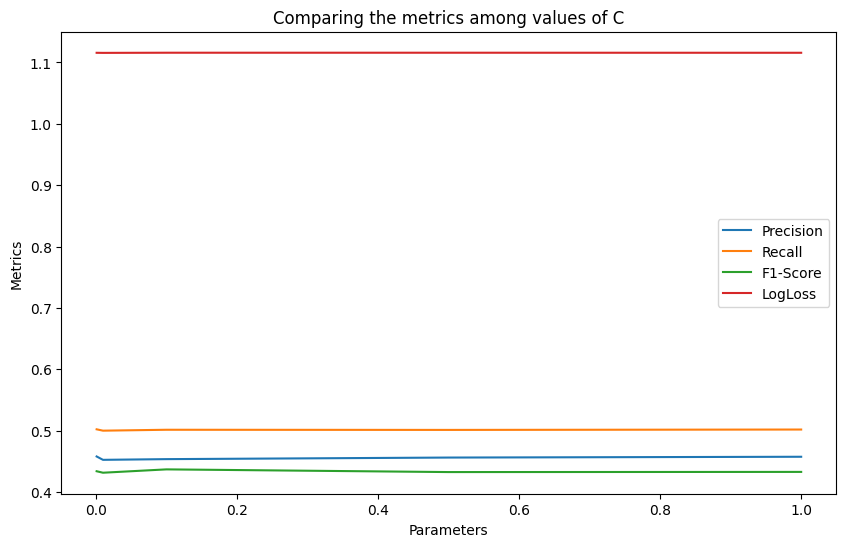

In [45]:
param_values = [0.001, 0.01, 0.1, 0.5, 1]

# Listas para almacenar los resultados de las métricas
accuracy_scor = []
precision_scores = []
recall_scores = []
f1_scores = []
logloss_scores = []


for param in param_values:
   
    model = LogisticRegression(C=param)
    model.fit(X_train_sub, y_train)
    
    
    y_pred = model.predict(X_test_num)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    logloss = log_loss(y_test, model.predict_proba(X_test_num))
    
    
   
    accuracy_scor.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    logloss_scores.append(logloss)

    print(f'Test log-loss : {logloss}')
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()

    
plt.figure(figsize=(10, 6))
#plt.plot(param_values, accuracy_scor, label='Accuracy')
plt.plot(param_values, precision_scores, label='Precision')
plt.plot(param_values, recall_scores, label='Recall')
plt.plot(param_values, f1_scores, label='F1-Score')
plt.plot(param_values, logloss_scores, label='LogLoss')
plt.xlabel('Parameters')
plt.ylabel('Metrics')
plt.title('Comparing the metrics among values of C')
plt.legend()
plt.show()


<function accuracy_score at 0x00000124B6CD3BA0>


We now study the method GradientBoosting(to execute this part of the proyect, execute all instructions until de Logisitc Regression one in order to have all the DataFrames well built)

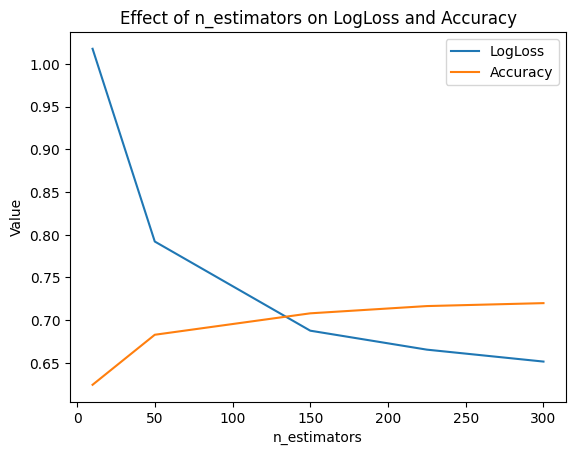

In [76]:
n_estimators_values = [10, 50, 150, 225, 300]

#In order to plot after
logloss_values = []
accuracy_values = []


for n in n_estimators_values:

    model = GradientBoostingClassifier(n_estimators=n, learning_rate=0.02, criterion='squared_error' )
    model.fit(X_train_sub, y_train) 
    
 
    y_pred = model.predict(X_test_num) 
    
    # LogLoss y Accuracy
    logloss = log_loss(y_test, model.predict_proba(X_test_num))
    accuracy = accuracy_score(y_test, y_pred)
    
    #Adding to the lists
    logloss_values.append(logloss)
    accuracy_values.append(accuracy)

#Plotting the metrics
plt.plot(n_estimators_values, logloss_values, label='LogLoss')
plt.plot(n_estimators_values, accuracy_values, label='Accuracy')
plt.xlabel('n_estimators')
plt.ylabel('Value')
plt.legend()
plt.title('Effect of n_estimators on LogLoss and Accuracy')
plt.show()

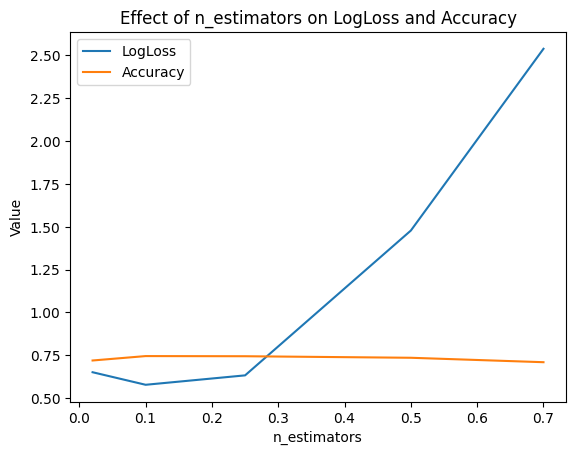

In [84]:
learning_rate_values = [0.02, 0.1, 0.25, 0.5, 0.7]


logloss_values = []
accuracy_values = []

for n in learning_rate_values:
    # Creating and adjunsting our model to our examples
    model = GradientBoostingClassifier(n_estimators=300, learning_rate=n, criterion='squared_error' )
    model.fit(X_train_sub, y_train) 
    
    #Predicting the 'y_test' we have created
    y_pred = model.predict(X_test_num)  # Reemplaza X_test y y_test con tus datos de prueba
    
    #Calculating LogLoss and accuracy
    logloss = log_loss(y_test, model.predict_proba(X_test_num))
    accuracy = accuracy_score(y_test, y_pred)
    
    #Adding to the lists
    logloss_values.append(logloss)
    accuracy_values.append(accuracy)

#Plotting the metrics
plt.plot(learning_rate_values, logloss_values, label='LogLoss')
plt.plot(learning_rate_values, accuracy_values, label='Accuracy')
plt.xlabel('n_estimators')
plt.ylabel('Value')
plt.legend()
plt.title('Effect of n_estimators on LogLoss and Accuracy')
plt.show()

Test log-loss : 0.5780918644696508
Accuracy: 0.7455395594930478


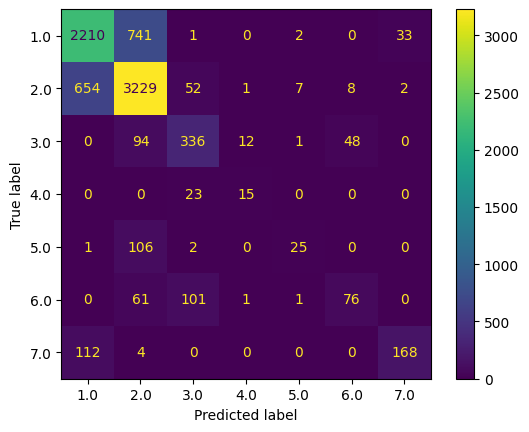

In [91]:
    model = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1)
    

    model.fit(X_train_sub, y_train)

    pred_prob_test = pd.DataFrame(model.predict_proba(X_test_num))
    loss = log_loss(y_test, pred_prob_test)
 
    print(f'Test log-loss : {loss}')
    
    # We measure the test accuracy and log score.
    y_pred = model.predict(X_test_num)
    test_accuracy = accuracy_score(y_pred, y_test)

    print('Accuracy:', test_accuracy)

    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()